# Practical tasks

##### Please explore the datasets and answer the questions below.
##### Here are some guidlines and advices you should consider:
* you can add as many cells as is comfortable for you for each answer
* some questions require your explanation. Add a cell and choose a markdown option in the menu 
* when you are making plots, please add labels to the axes

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
from sklearn.cluster import KMeans

# Clustering tasks

The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

The dataset for this problem `shopping-data.csv`

#### 1. Load the data and preview

In [254]:
customer_data = pd.read_csv('shopping-data.csv')

In [255]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [256]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### 2. Plot scatter plot for annual income and spending score which will be used for clustering in the next steps

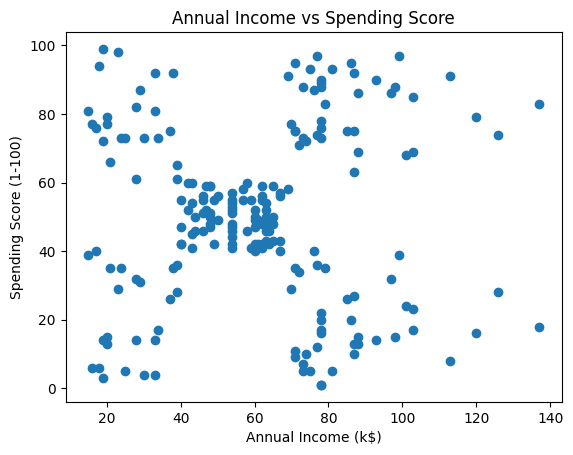

In [257]:
plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()


#### 3. Normalize the data

In [258]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['Annual Income (k$)', 'Spending Score (1-100)']])

print('\nScaled data :')
customer_df = pd.DataFrame(customer_data_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
customer_df.head()


Scaled data :


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


#### 4. Use Elbow method to decide number of clusters

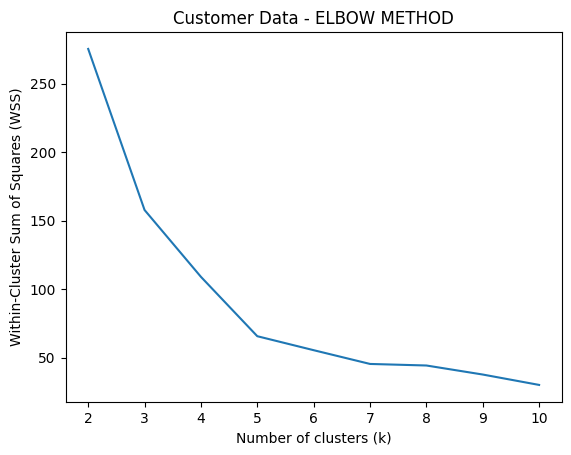

In [259]:
from sklearn.cluster import KMeans

elbow=[]

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,  init='k-means++', random_state=555, max_iter=200)
    kmeans.fit(customer_df)
    elbow.append(kmeans.inertia_)
    
plt.plot(range(2, 11), elbow)
plt.title('Customer Data - ELBOW METHOD')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.show()

#### Explanation

- The graph's elbow has a bend on 5, and the elbow kind of bend between 3 and 5.
- Since it seems after 5 we have a slow decrease in WSS, optimum k would be 5.

#### 5. Perform Clustering using KMeans

In [260]:
k = 5
Cluster_k = KMeans(n_clusters=k, max_iter=200)
Cluster_k.fit(customer_df)
y_pred = Cluster_k.predict(customer_df)

print('Cluster Centers :\n', Cluster_k.cluster_centers_)
customer_df['Cluster'] = y_pred


Cluster Centers :
 [[ 0.99158305  1.23950275]
 [-0.20091257 -0.02645617]
 [ 1.05500302 -1.28443907]
 [-1.32954532  1.13217788]
 [-1.30751869 -1.13696536]]


#### 6. Plot scatter plot and color code in clustered groups

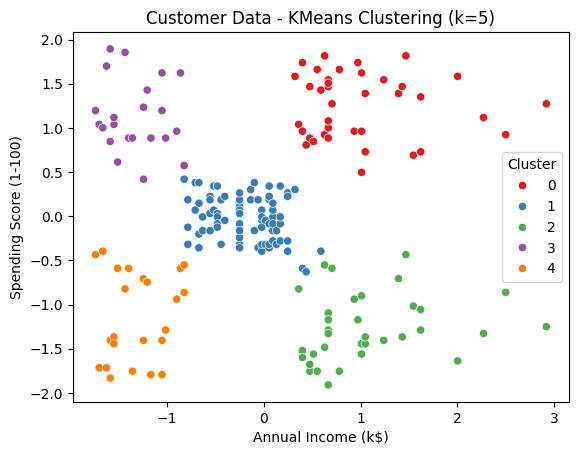

In [261]:

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=customer_df, palette='Set1')
plt.title('Customer Data - KMeans Clustering (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

#### 7. Plot dendrogram to decide number of clusters for Hierarchical Clustering. <br> Explain (free text in a markdown cell) what is the optimal number of clusters and why

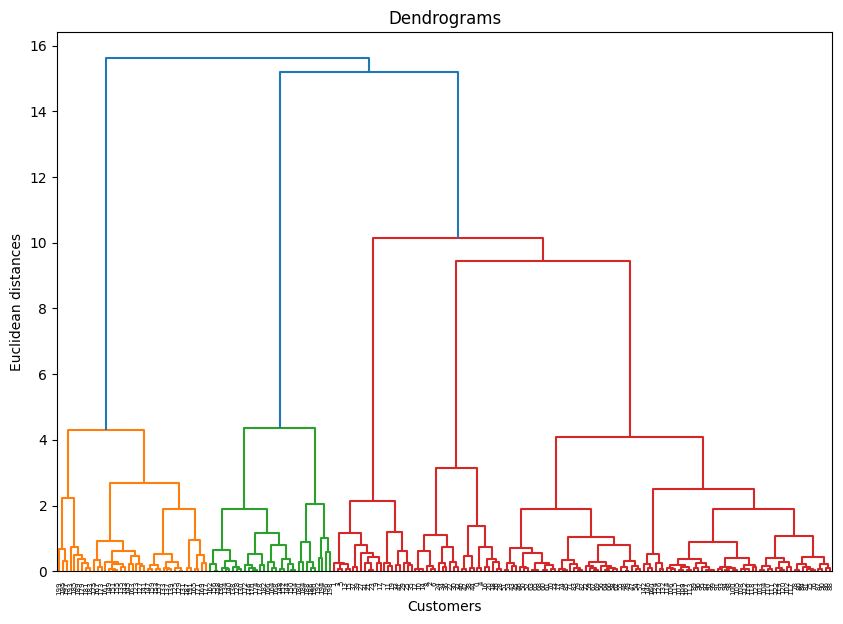

In [287]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

linkage = shc.linkage(customer_df[['Annual Income (k$)', 'Spending Score (1-100)']], method='ward')
dend = shc.dendrogram(linkage)
plt.show()

#### Explanation

- From the dendrogram we can see that the left most line has a huge jump to the next child trees
- So that we can draw the horizontal line between 10 and 14 on the y axis.
- That makes the optimal number of clusters equals 3 because there'll be 3 clusters under that horizontal line.

#### 8. Do clustering using Hierarchical Clustering

In [263]:
from sklearn.cluster import AgglomerativeClustering

k = 3

hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(customer_data_scaled)
customer_df['HC_Cluster'] = y_hc

y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### 9. Plot scatter plot and color code in clustered groups

Text(0.5, 1.0, 'Customer Data - Hierarchical Clustering (k=3)')

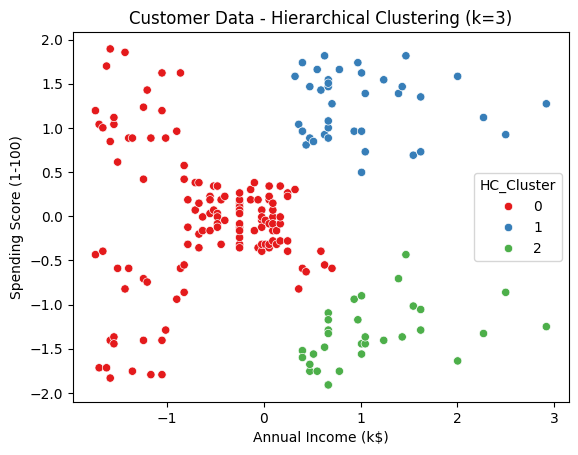

In [264]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='HC_Cluster',
    data=customer_df,
    palette='Set1'
)
plt.title('Customer Data - Hierarchical Clustering (k=3)')

####  10. Do KMeans and DBSCAN clustering on this data

In [265]:
from sklearn.datasets import make_moons
moons_X, moon_y = make_moons(n_samples=2000)

df_moons = pd.DataFrame(moons_X, columns=['x1', 'x2'])
df_moons.head()

,x1,x2
0,0.014384,0.330999
1,1.999288,0.462272
2,0.161073,-0.044243
3,0.997385,0.072266
4,0.624543,0.780990


Text(0.5, 1.0, 'Half Moons')

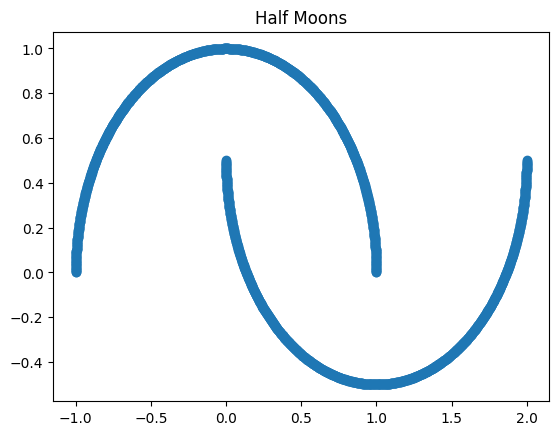

In [266]:
plt.scatter(moons_X[:,0],moons_X[:,1])
plt.title('Half Moons')

#### Using KMeans (do clustering and plot results (each cluster in own color))

In [267]:
k = 2
Cluster_moons_k = KMeans(n_clusters=k, max_iter=200)
Cluster_moons_k.fit(df_moons)
y_pred_moon = Cluster_moons_k.predict(df_moons)

print('Cluster Centers :\n', Cluster_moons_k.cluster_centers_)
df_moons['Cluster'] = y_pred_moon


Cluster Centers :
 [[ 1.19483557 -0.07412994]
 [-0.20463185  0.57869975]]


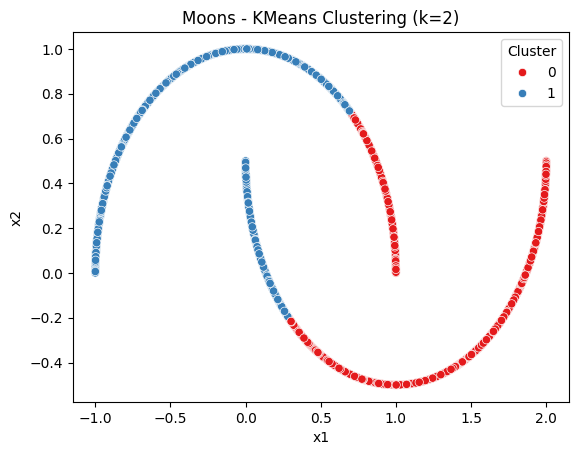

In [268]:
# Plotting

sns.scatterplot(x='x1', y='x2', hue='Cluster', data=df_moons, palette='Set1')
plt.title('Moons - KMeans Clustering (k=2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(title='Cluster')
plt.show()

#### 11. Using DBSCAN do clustering and plot results (each cluster in own color). Find the most suitable eps and minimal samples number

 Clusters: [0 1]


Text(0.5, 1.0, 'Moons - DBSCAN Clustering')

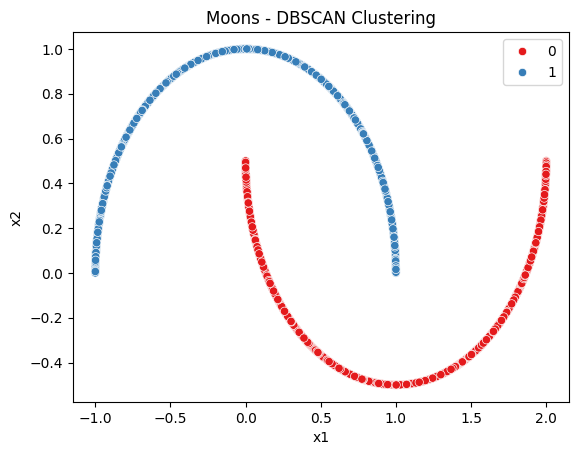

In [269]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5, min_samples=300)
yhat = model.fit_predict(df_moons[['x1', 'x2']])

clusters = np.unique(yhat)
print(' Clusters:', clusters)

sns.scatterplot(x='x1', y='x2', hue=yhat, data=df_moons, palette='Set1')
plt.title('Moons - DBSCAN Clustering')

#### 12. Compare the results of K-means and DBSCAN clustering
Explain why one or another is prefferable for such dataset, and differences if any.

- We can see that in the plot of K-Means clustering, it clustered the data in a circular way which cut the crescents, and that doesn't really help in these types of datasets.
- But in the case of DBSCAN, it successfully identified 2 different types data dense areas and clustered them
- Simply put, we can say that this types of irregularly shaped data can be clustered better with DBSCAN rather than K-Means.
- Also DBSCAN easily eliminate noise efficiently than K-means (This dataset doesn't have much noise though)

### Perform PCA on penguins :)
###### This section uses kaggle dataset (https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data)
###### The tasks below include data analysis, data preprocessing, PCA, and application of classification to predict the target

#### 13. Describe the data. Do any additional exporations as you feel

In [298]:
# Dataset
penguins = pd.read_csv('penguins.csv')
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [299]:
# decribe the data, its size
print("Data shape:", penguins.shape)
print("\nData description:")
print(penguins.describe())
print("\nData Info:")
print(penguins.info())

Data shape: (344, 5)

Data description:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         214.014620  4201.754386
std            5.459584         1.974793         260.558057   801.954536
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.750000  4750.000000
max           59.600000        21.500000        5000.000000  6300.000000

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    flo

#### Based on dataframe describe, in own words explain any abnormal characteristics 

- here we can see that it's a total of 344 entries. But there is only 335 data on column 'sex' and 342 data on other columns.
- the column sex is actually empty in 9 rows and but all other columns are empty in 2 rows.

#### 14. Explore corrupted data

In [300]:
# find missing values. print entries with missing values, provide shape

print("Missing values in columns:")
print(penguins.isnull().sum())

null_entries = penguins[penguins.isnull().any(axis=1)]
print("\nEntries with missing values (shape: {}):".format(null_entries.shape))
null_entries

Missing values in columns:
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Entries with missing values (shape: (9, 5)):


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,NaN,NaN,NaN,NaN,NaN
8,34.1,18.1,193.0,3475.0,NaN
10,37.8,17.1,186.0,3300.0,NaN
11,37.8,17.3,180.0,3700.0,NaN
47,37.5,18.9,179.0,2975.0,NaN
246,44.5,14.3,216.0,4100.0,NaN
286,46.2,14.4,214.0,4650.0,NaN
324,47.3,13.8,216.0,4725.0,NaN
339,NaN,NaN,NaN,NaN,NaN


In [301]:
# Examine sex column
print("\nUnique values in 'sex' column:")
print(penguins['sex'].unique())

print("\nCount of each value in 'sex' column:")
penguins['sex'].value_counts(dropna=False)


Unique values in 'sex' column:
['MALE' 'FEMALE' nan '.']

Count of each value in 'sex' column:


sex
MALE      169
FEMALE    165
NaN         9
.           1
Name: count, dtype: int64

In [302]:
# find any unusual values. Print anomal rows
penguins[~penguins['sex'].isin(['FEMALE', 'MALE'])]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,NaN,NaN,NaN,NaN,NaN
8,34.1,18.1,193.0,3475.0,NaN
10,37.8,17.1,186.0,3300.0,NaN
11,37.8,17.3,180.0,3700.0,NaN
47,37.5,18.9,179.0,2975.0,NaN
246,44.5,14.3,216.0,4100.0,NaN
286,46.2,14.4,214.0,4650.0,NaN
324,47.3,13.8,216.0,4725.0,NaN
336,44.5,15.7,217.0,4875.0,.
339,NaN,NaN,NaN,NaN,NaN


#### 15. Based on observations above, prepare the data for PCA. Only valid rows should be present. <br> Preview dataframe, show its size

In [303]:
# clean
penguins = penguins.dropna()
print("Cleaned data shape:", penguins.shape)

# fill missing or abnormal values for 'sex'
mode_sex = penguins['sex'].mode()[0]
penguins.loc[penguins['sex'].isin(['.']), 'sex'] = mode_sex

print("\nRemaining null entries:", penguins[penguins.isnull().any(axis=1)].shape)

penguins['sex'].value_counts(dropna=False)



Cleaned data shape: (335, 5)

Remaining null entries: (0, 5)


sex
MALE      170
FEMALE    165
Name: count, dtype: int64

In [304]:
# scale numerical columns. assign to a variable X_penguins
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
X_penguins = scaler.fit_transform(penguins[numerical_cols])

In [315]:
# assign categorical column to a variable y_penguins
y_penguins = penguins['sex']

#### 15. Explain the chosen null values handling strategy, how it affects the dataset (+/-)

- I had 2 options to choose, removing the entries with missing data or populate them with most frequent value.
- I chose to remove the values since only 9 rows had missing values out of 344, among that 2 rows were completely missing so effectively 7 out of 342 data.
- Because it's around 2% of the dataset, so that it might not affect the dataset significantly, but if I choose to do imputation by populating with most frequent value, it might cause biases in the dataset. Hence removing would be a positive strategy.

#### 16. Perform PCA with 2 components. Plot the results 

In [321]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_penguins)

print(f"Shape after PCA: {X_pca.shape}")
print(f"\nExplained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")

X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df.head()

Shape after PCA: (335, 2)

Explained variance ratio: [0.46903342 0.25345738]
Total variance explained: 72.25%


,PC1,PC2
0,-1.275754,-0.067510
1,-0.863413,-0.175341
2,-1.378170,-0.099023
3,-1.921813,-0.015671
4,-1.816714,0.161241


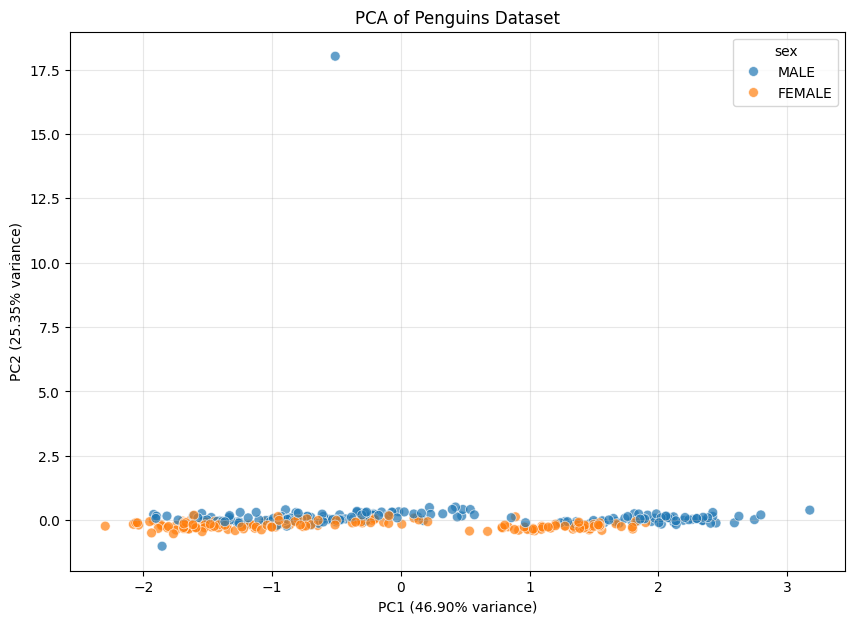

In [339]:
# Plotting

plt.figure(figsize=(10, 7))
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'sex': y_penguins.values
})
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='sex', s=50, alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA of Penguins Dataset')
plt.grid(True, alpha=0.3)
plt.show()

#### 17. Display scree plots to determine the optimal number of components and cumulative explained variance

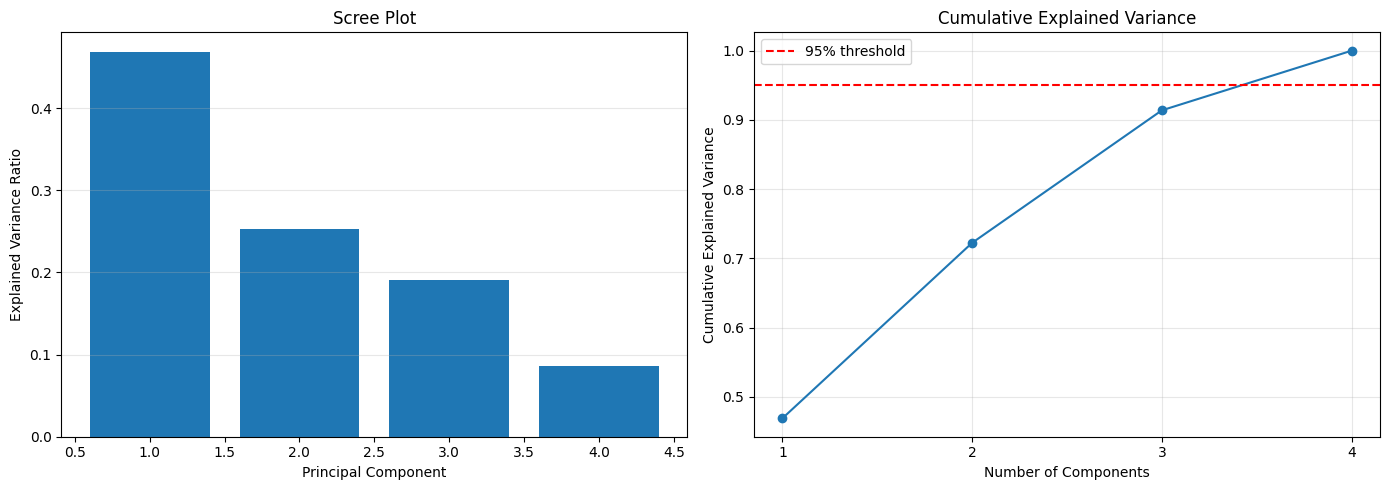

Explained Variance Ratio: [0.46903342 0.25345738 0.19138626 0.08612294]
Cumulative Explained Variance: [0.46903342 0.72249081 0.91387706 1.        ]


In [346]:
pca_full = PCA()
pca_full.fit(X_penguins)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
axes[0].bar(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Scree Plot')
axes[0].grid(axis='y', alpha=0.3)

# CEV
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xticks(range(1, len(cumulative_variance) + 1))
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Explained Variance Ratio:", pca_full.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)

#### Explanation

- The 95% threshold crosses after 3 components, Hence 3 is the optimal number of components

#### 18. Calculate (show in numbers) and display component loadings

In [351]:
# Component loadings (how much each original feature contributes to each PC)
loadings = pd.DataFrame(
    pca_full.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca_full.components_))],
    index=numerical_cols)
print("\nComponent Loadings:")
loadings


Component Loadings:


,PC1,PC2,PC3,PC4
culmen_length_mm,0.569850,0.085425,0.603308,-0.551356
culmen_depth_mm,-0.498869,0.205311,0.764539,0.352786
flipper_length_mm,0.023770,0.973834,-0.217264,-0.062287
body_mass_g,0.652561,0.046887,0.065548,0.753438


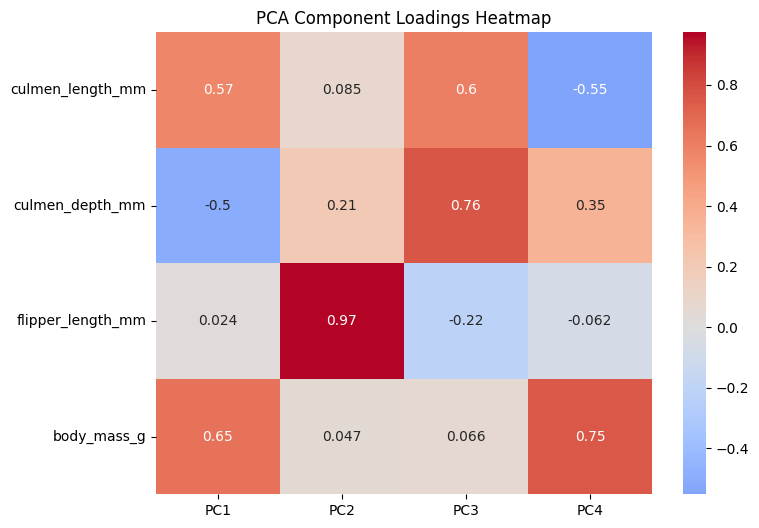

In [352]:
# show heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings Heatmap')
plt.show()  

#### 19. Perform logistic regression (or any other classification algorithm) and evaluate the model

In [355]:
# import necessary libraries for model training and evaluation
# Use the PCA-transformed data (X_penguins_pca) and true labels (y_penguins)
# Train and evaluate a model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

pca3 = PCA(n_components=3)
X_penguins_pca = pca3.fit_transform(X_penguins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_penguins_pca, y_penguins, test_size=0.2, random_state=42)

# Train lr model
lr_model = LogisticRegression(random_state=42, max_iter=200)
lr_model.fit(X_train, y_train)

# predict
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

print("\nTraining Set Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Precision: {precision_score(y_train, y_pred_train, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_train, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_train, y_pred_train, average='weighted'):.4f}")

print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_test, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_test, average='weighted'):.4f}")

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_test))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))


Training Set Metrics:
Accuracy: 0.8246
Precision: 0.8246
Recall: 0.8246
F1-Score: 0.8246

Test Set Metrics:
Accuracy: 0.7910
Precision: 0.7956
Recall: 0.7910
F1-Score: 0.7905

Confusion Matrix (Test Set):
[[25  9]
 [ 5 28]]

Classification Report (Test Set):
              precision    recall  f1-score   support

      FEMALE       0.83      0.74      0.78        34
        MALE       0.76      0.85      0.80        33

    accuracy                           0.79        67
   macro avg       0.80      0.79      0.79        67
weighted avg       0.80      0.79      0.79        67



#### 20. Train the model on all data points, and determine penguin sex for the data, where it was not originally identified

In [368]:
# 1. take entries from original data without sex, scale numerical columns

penguins_original = pd.read_csv('penguins.csv')

# Rows with missing sex
missing_sex = penguins_original['sex'].isnull() | (penguins_original['sex'] == '.')
missing_sex_data = penguins_original[missing_sex].dropna(how='all')

scaler_new = StandardScaler()
penguins_with_sex = penguins_original[~missing_sex & penguins_original[numerical_cols].notna().all(axis=1)]
scaler_new.fit(penguins_with_sex[numerical_cols])

# Scale numerical columns for missing sex data
X_missing = scaler_new.transform(missing_sex_data[numerical_cols])
print(f"\nScaled missing data shape: {X_missing.shape}")
x_missing_df = pd.DataFrame(X_missing, columns=numerical_cols)
x_missing_df


Scaled missing data shape: (8, 4)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-1.812980,0.469998,-0.081090,-0.912034
1,-1.134499,-0.037533,-0.107681,-1.130020
2,-1.134499,0.063973,-0.130472,-0.631767
3,-1.189511,0.876024,-0.134271,-1.534851
4,0.094102,-1.458621,0.006278,-0.133514
5,0.405837,-1.407868,-0.001319,0.551584
6,0.607547,-1.712387,0.006278,0.645007
7,0.094102,-0.748077,0.010077,0.831852


In [374]:
# 2. Apply the same PCA transformation to the missing data
X_missing_pca = pca3.transform(X_missing)

print(f"Missing data after PCA shape: {X_missing_pca.shape}")
print("\nFirst few PCA-transformed missing data points:")
print(X_missing_pca[:5])

Missing data after PCA shape: (8, 3)

First few PCA-transformed missing data points:
[[-1.86467961 -0.18010814 -0.77661702]
 [-1.36773643 -0.26246587 -0.76382265]
 [-1.09377603 -0.24045953 -0.64860604]
 [-2.1196388  -0.12447805 -0.11932103]
 [ 0.69430836 -0.29157807 -1.06851503]]


In [375]:
# 3. Train the model
lr_model_final = LogisticRegression(random_state=42, max_iter=200)
lr_model_final.fit(X_penguins_pca, y_penguins)

print("Model trained on all valid data points")
print(f"Training data size: {len(y_penguins)}")
print(f"Classes: {lr_model_final.classes_}")
print(f"Training accuracy: {lr_model_final.score(X_penguins_pca, y_penguins):.4f}")

Model trained on all valid data points
Training data size: 335
Classes: ['FEMALE' 'MALE']
Training accuracy: 0.8119


In [376]:
# 4. Make predictions on the new data. Display the features and predicted values
predictions = lr_model_final.predict(X_missing_pca)

probabilities = lr_model_final.predict_proba(X_missing_pca)

results_df = pd.DataFrame({
    'culmen_length_mm': missing_sex_data['culmen_length_mm'].values,
    'culmen_depth_mm': missing_sex_data['culmen_depth_mm'].values,
    'flipper_length_mm': missing_sex_data['flipper_length_mm'].values,
    'body_mass_g': missing_sex_data['body_mass_g'].values,
    'Predicted_Sex': predictions,
    'Confidence': probabilities.max(axis=1)
})

print("\nPredicted penguin sex for data with missing values:")
print(results_df.to_string())

print(f"\nTotal predictions made: {len(predictions)}")
print(f"Average confidence: {results_df['Confidence'].mean():.4f}")


Predicted penguin sex for data with missing values:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g Predicted_Sex  Confidence
0              34.1             18.1              193.0       3475.0        FEMALE    0.920148
1              37.8             17.1              186.0       3300.0        FEMALE    0.915468
2              37.8             17.3              180.0       3700.0        FEMALE    0.880203
3              37.5             18.9              179.0       2975.0        FEMALE    0.773528
4              44.5             14.3              216.0       4100.0        FEMALE    0.886930
5              46.2             14.4              214.0       4650.0        FEMALE    0.757768
6              47.3             13.8              216.0       4725.0        FEMALE    0.779446
7              44.5             15.7              217.0       4875.0        FEMALE    0.592261

Total predictions made: 8
Average confidence: 0.8132
